<a href="https://colab.research.google.com/github/Slim205/Nuclear-Reactor-Safety-Study/blob/main/Feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mutual Inforamtion :

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


# Load data
df = pd.read_csv("test.csv")


# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

<ipython-input-11-cb94cf75410a>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [ ]:
df.pop('Unnamed: 0')

0      491
1      349
2       30
3      200
4      227
      ... 
495    694
496    526
497    587
498    850
499    427
Name: Unnamed: 0, Length: 500, dtype: int64

In [ ]:
df

,Enthalpie_R1,Pression_R1,Carac_evac_R1,Temperature_R2,Puissance_P1_R2,Puissance_P2_R2,Critere_temperature,Critere_chargement
0,102948.94210,43.26443,1109.19443,30.72276,0.71778,0.57183,10.372,1.115
1,42716.42011,43.36316,1813.36656,30.23835,0.17922,0.48744,11.893,1.069
2,56336.74453,42.31880,1291.78206,45.90732,0.07189,0.74322,20.617,1.439
3,71363.37814,43.11073,1141.27439,42.26264,0.23294,0.98156,16.449,1.313
4,96877.02612,43.08488,808.37851,25.73034,0.70311,0.58696,5.549,1.058
...,...,...,...,...,...,...,...,...
495,60547.45032,42.04018,971.77295,40.35916,0.74656,0.13991,26.803,1.313
496,47173.24942,42.83448,1112.30410,8.21581,0.11723,0.74553,-11.813,0.832
497,54957.68264,42.02845,1114.13291,55.63390,0.22813,0.79770,30.680,1.769
498,59764.47810,41.44554,1125.88196,11.67939,0.45930,0.42631,-8.601,0.884


In [ ]:
X = df.copy()
y = X.pop('Critere_temperature')
z = X.pop('Critere_chargement')

mi_scores = make_mi_scores(X, y)

Temperature_R2     1.454224
Puissance_P1_R2    0.082194
Puissance_P2_R2    0.070946
Carac_evac_R1      0.001102
Enthalpie_R1       0.000000
Pression_R1        0.000000
Name: MI Scores, dtype: float64


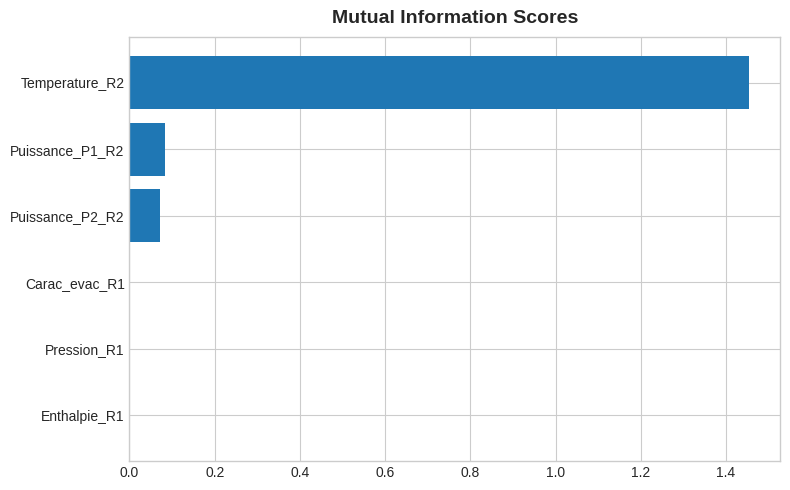

In [ ]:
print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

In [ ]:
#Temperature is the most important feature

# Creating features :